## Descriptive statistics and Exploratory Data Analysis

In real world applications, the distributions and parameters of random variables are rarely known. Instead, we must determine reasonable forms and values from a data set.

A first approach is to visualize the data set. In order to be able to find a reasonable distribution to use, we have to be able to identify distributions.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(seed=42)
def histogram(X, bins=None):
    plt.hist(X, bins=bins)   

def ogive(X, bins=None):
    plt.hist(X, cumulative=True, bins=bins)   

The simplest discrete distribution is the Bernoulli, or two-point, distribution.

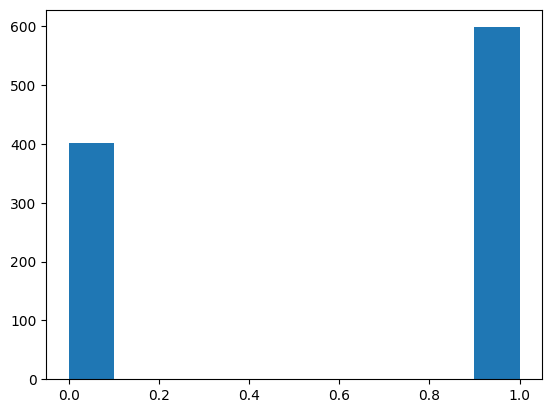

In [21]:
X = rng.choice([0,1], size=1000,p=[0.4, 0.6])
histogram(X)

Below is a geometric distribution. The only parameter is $p$, the probability of success on each Bernoulli trial. Note that even though the probability of success is about a third, there was one experiment that took twenty trials to succeed!

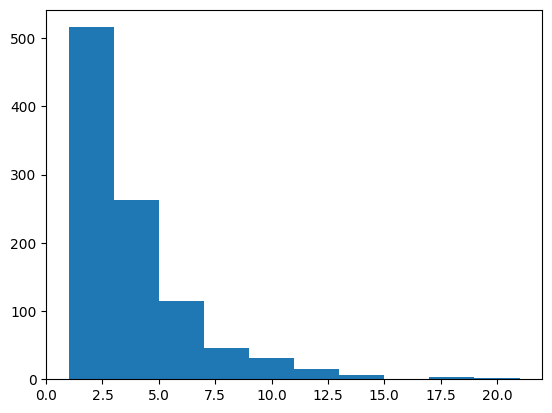

In [22]:
X = rng.geometric(p=0.31, size=1000)
histogram(X)

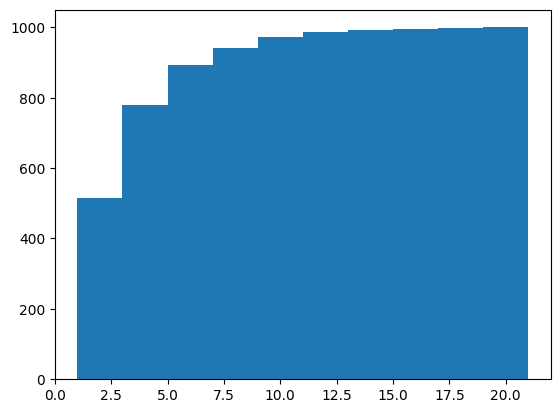

In [23]:
ogive(X)

The binomial and negative binomial distributions can be difficult to tell apart unless $n$ is large and the sample sizes are also large. In general, the binomal is centered while the negative binomial tends to have a tail on the right and the hump towards the left of the median, but here the thrid and fourth moments (skew and kurtosis) come in to play. Look for the hump and tail if you suspect it's a negative binomial. Changing the number of bins can sometimes help! However, ultimately _likelihood_ tests are the best way to tell them apart in machine learning, where we only have noisy and incomplete data to work with. By _maximizing_ the likelihood, we end up choosing the most probably distribution for all the data. More on this at the end of the course!

For now, let's look at the distributions in histograms, for a fairly large number of trials (100) in one thousand experiments.

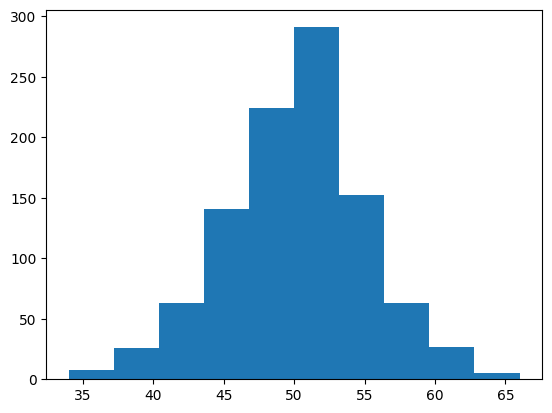

In [24]:
X = rng.binomial(n=100,p=.5,size=1000)
histogram(X)

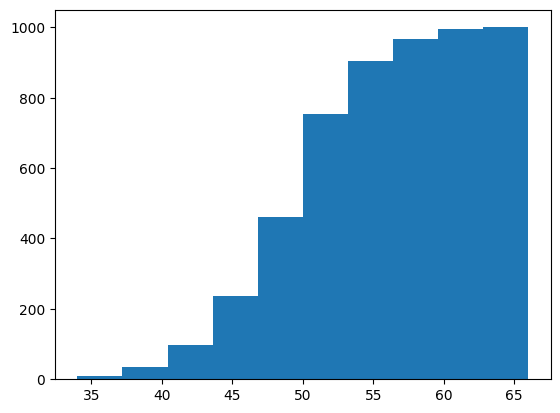

In [25]:
ogive(X)

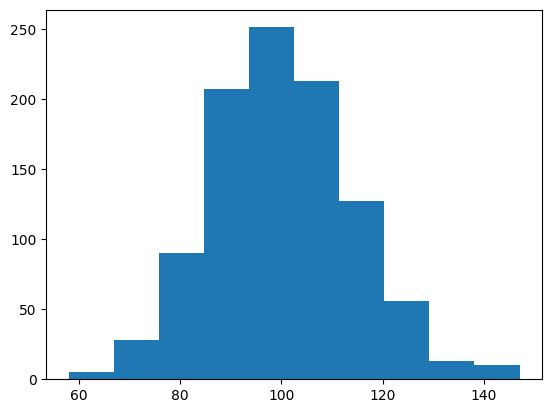

In [26]:
X = rng.negative_binomial(n=100,p=.5,size=1000)
histogram(X)

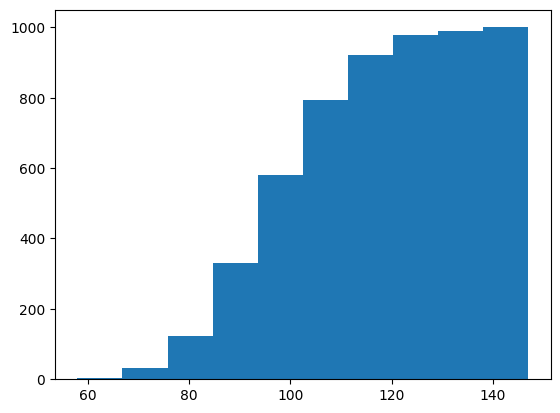

In [27]:
ogive(X)

It's hard to see, but there is a slight skew and kurtosis on the negative binomial. The tail is on the right, hump on the left; this is known as a _right skew_. The size and shape of the tail is the kurtosis momentAlso note that the CDF increases faster.

In a histogram for large samples and many trials $n$ it is practically impossible to tell a binomial distribution from a normal distribution. One clue is to look at the values -- a binomial has larger positive values, while a normal and standard normal have smaller negative and positive values (compared to the mean). 

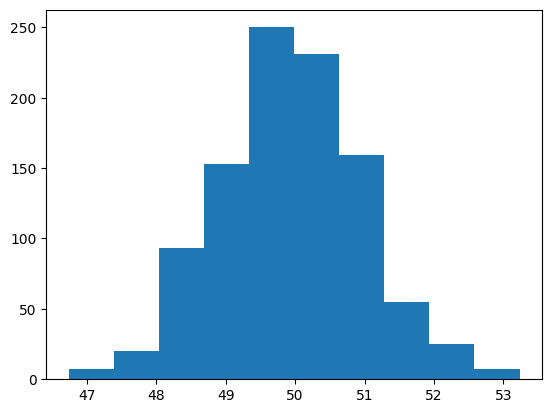

In [28]:
X = rng.normal(size=1000,loc=50)
histogram(X)

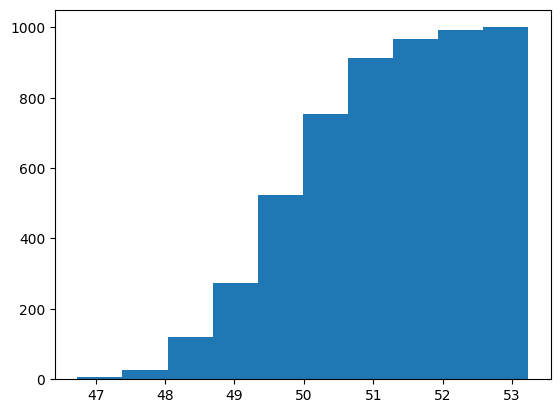

In [29]:
ogive(X)

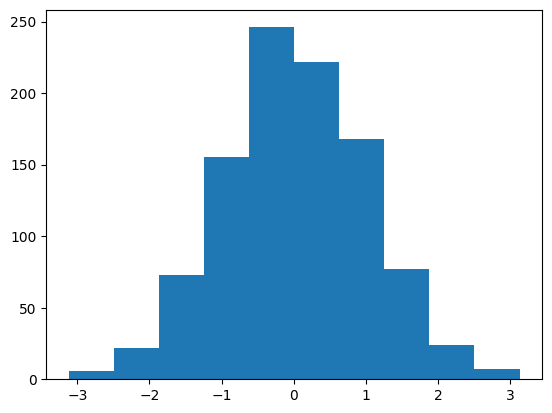

In [30]:
X = rng.standard_normal(size=1000)
histogram(X)

Now lets look at some data!

In [31]:
import pandas as pd

df = pd.read_csv("../Data/Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Here, the Sales column is the result and the other columns are how much has been spent on each form of advertising. 


### Exercise 1

a) Make a histogram and/or ogive of the Sales column. Try to reason about what kind of distribution this is. Is there some known stochastic process or do you have to make some generic assumption?

b) Can you think of some mathematical method to figure out which distribution is most _alike_? (don't go too hard on trying to implement this one, it will probably be very frustrating)

b) Make a boxplot and comment on which plot you prefer (for whatever reason). 

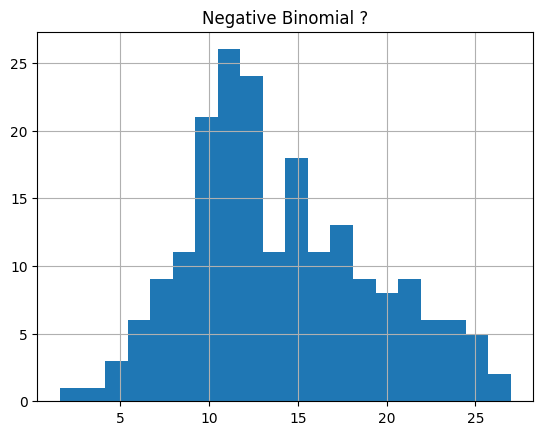

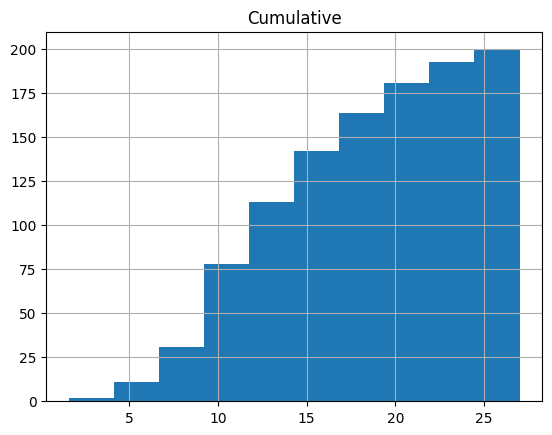

In [38]:
#Uppgift 1A

df["Sales"].hist(bins=20)
plt.title("Negative Binomial ?")
plt.show()
df["Sales"].hist(cumulative=True)
plt.title("Cumulative")
plt.show()


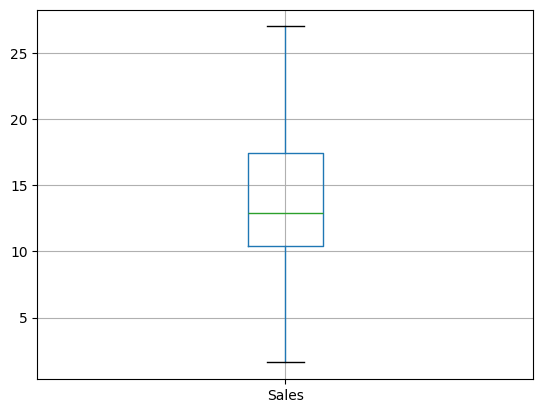

In [ ]:
#Uppgift 1C

df.boxplot(column="Sales")
plt.show()

Jag föredrar ett histogram före en boxplot för att man ser skevheten på datan, om det är normalfördelning och om det finns flera toppar.

### Exercise 2

Produce scatter-plots of TV against Sales.

a) Can you identify some _trend_ visually?

b) How could you test for such a trend? <em>Tip: check out <code>cov</code> and <code>corr</code> in pandas DataFrame class</em>

c) Can you motivate your findings with mathematical statistics?

<Axes: xlabel='TV', ylabel='Sales'>

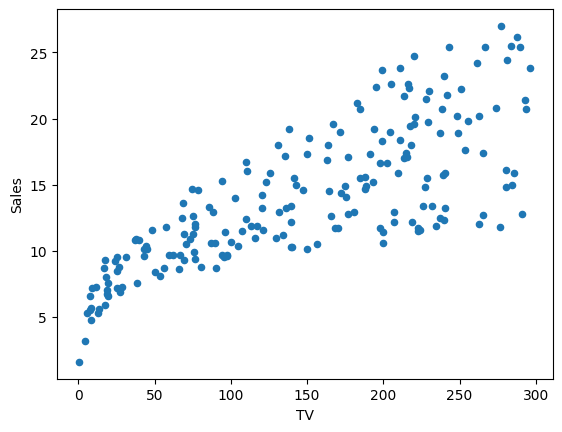

In [ ]:
#Uppgift 2A

df.plot.scatter(x="TV", y="Sales")
#Datan är linjär, desto mer pengar du lägger på TV desto mer sales får du. Man kan också se att variansen blir
#större desto mer pengar du spenderar.



In [ ]:
#Uppgift 2B-C

print(df["TV"].cov(df["Sales"]))
print(df["TV"].corr(df["Sales"]))
#Korrelation visar att TV påverkar sales positivt.

350.3901947236182
0.7822244248616066


### Exercise 3

Use the same method from exercise 2 and investigate Radio and Newspaper.

Answer the same questions, where appropriate, for these other two variables.


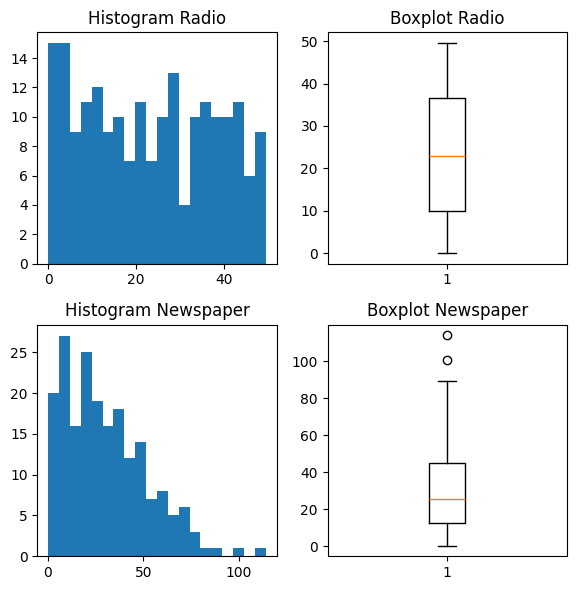

In [59]:
#Uppgift 3

fig, ax = plt.subplots(2,2, figsize=(6,6))
ax[0,0].hist(df["Radio"], bins=20)
ax[0,0].set_title("Histogram Radio")
ax[0,1].boxplot(df["Radio"])
ax[0,1].set_title("Boxplot Radio")
ax[1,0].hist(df["Newspaper"], bins=20)
ax[1,0].set_title("Histogram Newspaper")
ax[1,1].boxplot(df["Newspaper"])
ax[1,1].set_title("Boxplot Newspaper")
plt.tight_layout()
plt.show()



<Axes: xlabel='Sales', ylabel='Radio'>

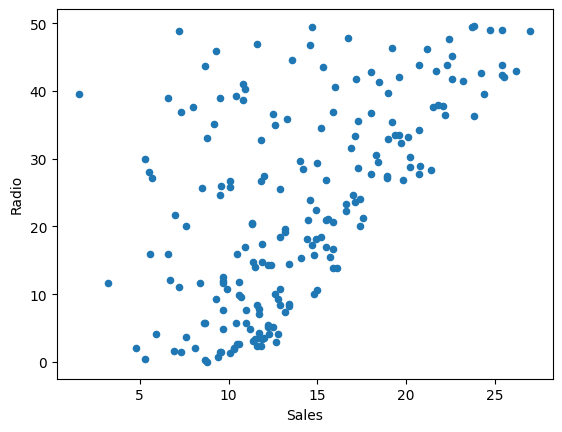

In [ ]:
fig, ax = plt.subplots(2,2)

ax[0,0].scatter(x)

#### Exercise 4

There are a lot of statistics computed automatically by pandas and numpy. 

Run the command <code> df.describe() </code>

Refer to the lecture notes and book to describe what the output of the command means.

a) How is the mean computed? Verify the value by computing it directly on your own.

b) How is the standard deviation computed? Verify the value as above.

c) What is the meaning of the remaining values?

### Exercise 5

Far from all usual statistics are computed by <code>describe()</code>, but they are easily available in pandas.

a) Find a function in pandas and use it to compute the median and mode of the columns in the dataframe. How do those location statistics compare to the mean?

b) Verify whether pandas uses _Bessel's correction_ for the sample variance. Compute it on your own and compare with what pandas reports. Why is Bessel's correction used at all?